# introduction to linear egression 
Linear regression is a type of supervised machine learning algorithm that computes the linear relationship between a dependent variable and one or more independent features. When the number of the independent feature, is 1 then it is known as Univariate Linear regression, and in the case of more than one feature, it is known as multivariate linear regression. The goal of the algorithm is to find the best linear equation that can predict the value of the dependent variable based on the independent variables. The equation provides a straight line that represents the relationship between the dependent and independent variables. The slope of the line indicates how much the dependent variable changes for a unit change in the independent variable(s).

In [29]:
#import soe librairs that are needed 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [ ]:
#to read the csv file 
df=pd.read_csv("Salary_dataset.csv")

In [12]:
#PRINT THE FIVE ROWS OF THE DATA 
df.head(5)

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [22]:
#PRINTTH info of the datast having colomns and entries 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [13]:
#provide summery
df.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


# clean data

In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [15]:
check_nan = df.isnull().values.any()
print(check_nan)

False


In [16]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [17]:
df.duplicated().sum()

0

# analsis

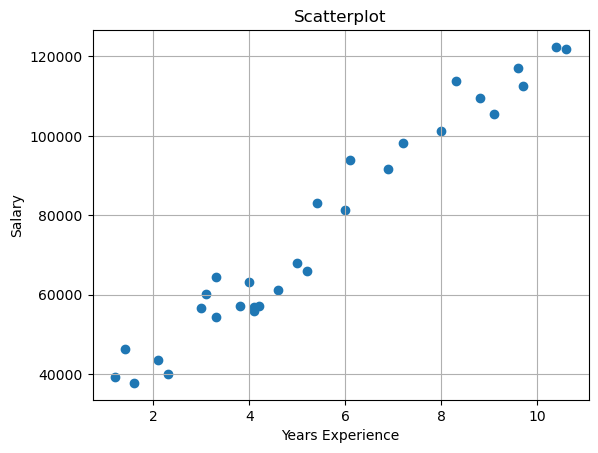

In [33]:
plt.scatter(x=df['YearsExperience'],y=df['Salary']) 
plt.title('Scatterplot')
plt.xlabel('Years Experience')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

# split data

In [19]:
from sklearn.model_selection import train_test_split

X=df['YearsExperience']
y=df['Salary']

# 70/30 split for training/testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
#printing shape 
print(X_train.shape)
print(y_train.shape)

(21, 1)
(21, 1)


In [21]:
# Reshape to have shape (21, 1)
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)


print(X_train.shape)  
print(y_train.shape)
print(X_test.shape)

(21, 1)
(21, 1)
(9, 1)


# building model

In [23]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

# pridiction

In [25]:
y_prediction = model.predict(X_test)
print(y_prediction)

[[115574.62288352]
 [ 71680.93878159]
 [102499.90847018]
 [ 75416.57147111]
 [ 55804.4998511 ]
 [ 60474.04071301]
 [122111.98009019]
 [107169.44933209]
 [ 63275.76523015]]


# visulization

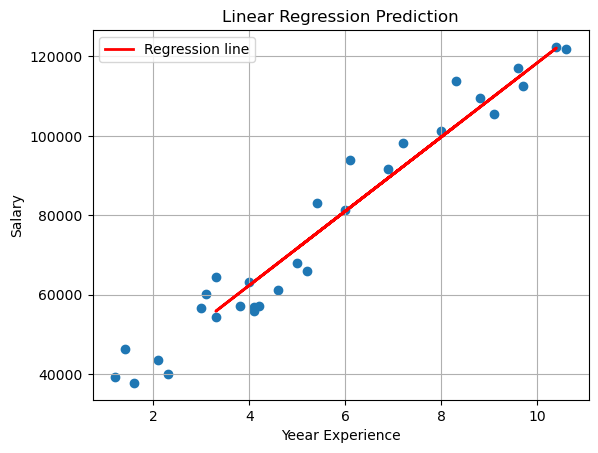

In [26]:
# scatter plot
plt.scatter(x=df['YearsExperience'], y=df['Salary'])

# plotting the regression line (predictions)
plt.plot(X_test, y_prediction, color='red', linewidth=2, label='Regression line')

# labeling the plot
plt.xlabel('Yeear Experience')
plt.ylabel('Salary')
plt.title('Linear Regression Prediction')
plt.legend()
plt.grid(True)

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Compute statistics
mae = mean_absolute_error(y_test, y_prediction)
mse = mean_squared_error(y_test, y_prediction)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_prediction)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 (Coefficient of Determination): {r2}")


Mean Absolute Error (MAE): 5161.328710400178
Mean Squared Error (MSE): 37784662.46621308
Root Mean Squared Error (RMSE): 6146.9230079945755
R^2 (Coefficient of Determination): 0.9414466227178215


# result
The linear regression model captures the underlying trend in the dataset,
as evidenced by an R^2 value of 0.9414. This indicates that approximately 94.14% of the variation in the target variable is explained by the model. 
The RMSE of 6146.92 suggests that the typical prediction error is $6,146.92."""